In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lab 6 - Fisher's Linear Discriminant and Logistic Regression
- For equations, refer to Bishop's book, Section 4.1.4 and the slides

# Part I - Fisher's Linear Discriminant for Binary Classification (2 classes)

## Data Generation and Visualisation
- First we'll use scikit-learn to generate 2 blobs of data in 2D, using the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function.
- The data consists of 600 points divided into 2 classes, 0 and 1.

In [146]:
from sklearn.datasets import make_blobs

In [147]:
X, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=0)

Let's confirm the data has two classes

In [148]:
np.unique(y)

array([0, 1])

## Exercise 1
- Now create a scatter plot to visualise the generated data. 
- Make sure to paint each point based on the class they belong to, as shown in the Figure below.

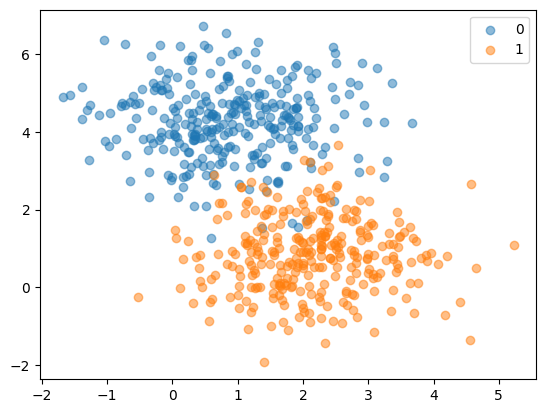

In [149]:
# your code goes here:
def plot_data(X_data:np.ndarray, y_labels:np.ndarray):
    for label in np.unique(y_labels):
        X_label = X_data[y_labels==label]

        plt.scatter(X_label[:,0], X_label[:, 1], alpha=0.5, label=str(label))

    plt.legend()

plot_data(X, y)

## Exercise 2
* Now plot a histogram of the data projected on each of the 2 dimensions of $X$ ($0$ and $1$)

As an example, below is a figure that shows the projection on dimension $1$.

_Tips:_ 
* You can either use `histplot()` to generate the plot, in which case it might be easier to pack $X$ and $y$ into a pandas DataFrame.
* Alternatively, considering that you will generate this plot many times throughout this lab, you can write a function that takes the projected vector and the class labels.
* Use 30 bins to obtain a similar plot.

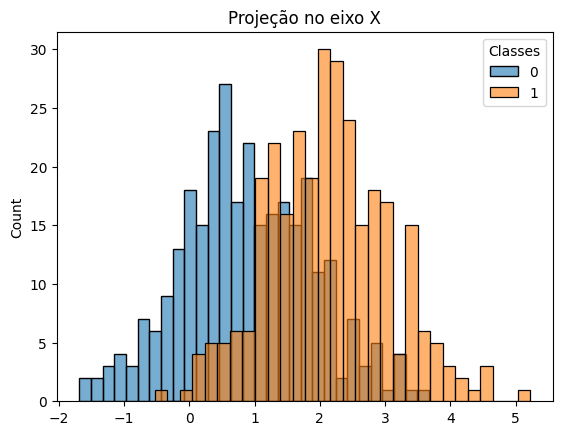

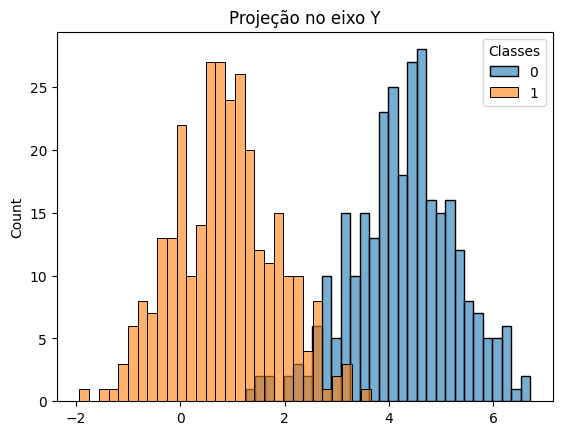

In [173]:
# your code goes here
def plot_hist(X_data:np.ndarray, y_labels:np.ndarray, title:str=""):
    for classe in np.unique(y_labels):
        sns.histplot(X_data[y_labels==classe], label=str(classe), alpha=0.6, bins=30)
        
    plt.legend(title="Classes")
    if title != "":
        plt.title(str(title))

    plt.show()

plot_hist(X[:,0], y, "Projeção no eixo X")
plot_hist(X[:,1], y, "Projeção no eixo Y")

## Exercise 3 - Implement Fisher's linear discriminant

* Use numpy to calculate $\vec{w}$.
* Plot the data (as you did in Exercise 1), and add a line on the direction of $\vec{w}$ (reference Figure below).
* Project the points onto the calculated vector, and plot the projection (as you did in Exercise 2) (reference Figure below).

In [151]:
# your code goes here:
def get_cov(X_data:np.ndarray, mean:np.ndarray, axis_samples:int) -> np.ndarray:
    samples = np.size(X_data, axis=axis_samples)
    X_data -= mean
    return (X_data.T @ X_data) / (samples - 1)


def fisher(X_data:np.ndarray, y_labels:np.ndarray) -> np.ndarray:
    X_0 = X_data[y_labels==0]
    X_1 = X_data[y_labels==1]

    m_0 = np.mean(X_0, axis=0)
    m_1 = np.mean(X_1, axis=0)

    cov_0 = get_cov(X_0, m_0, 0)
    cov_1 = get_cov(X_1, m_1, 0)

    cov_data = cov_0 + cov_1

    w = np.linalg.inv(cov_data) @ (m_1 - m_0)

    return w

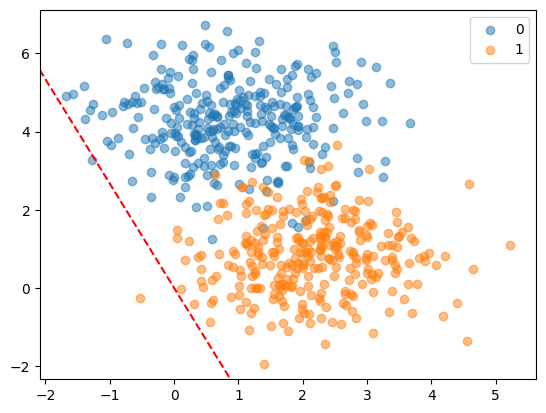

In [172]:
# your code goes here:
w = fisher(X, y)
points = np.linspace(-3, 2, 600)

line = points*(w[1]/w[0])

plot_data(X, y)
plt.plot(points, line, color="red", linestyle="--", label="solution")
plt.xlim(min(X[:,0]) - 0.4, max(X[:,0]) + 0.4)
plt.ylim(min(X[:,1]) - 0.4, max(X[:,1]) + 0.4)
plt.show()

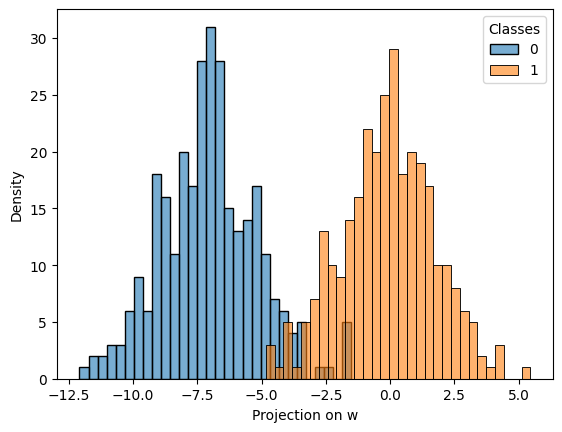

In [176]:
# your code goes here:
X_proj = X @ w

plt.xlabel("Projection on w")
plt.ylabel("Density")
plot_hist(X_proj, y)

## Exercise 4

* In this exercise you will use the `RidgeClassifier` from sklearn (as shown below) to obtain the class predictions from different types of projections:
    * component 0 of the data
    * component 1 of the data
    * the calculated vector $\vec{w}$
    
* Calculate the accuracy of these predictions using `accuracy_score` from sklearn.

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [156]:
# Follow this structure for each projection:
r = RidgeClassifier()
r.fit(projection, y)
predicted_y = r.predict(projection)
accuracy = accuracy_score(predicted_y, y)

NameError: name 'projection' is not defined

In [185]:
# your code goes here:
def predict_ridge(projection):
    r = RidgeClassifier()
    r.fit(projection, y)
    predicted_y = r.predict(projection)
    accuracy = accuracy_score(predicted_y, y)
    return accuracy

projection_0 = X[:, 0]
projection_1 = X[:, 1]
projection_w = X @ w

accu_1 = predict_ridge(projection_0.reshape(-1, 1))
accu_2 = predict_ridge(projection_1.reshape(-1, 1))
accu_3 = predict_ridge(projection_w.reshape(-1, 1))

print(f"First dimension projection accuracy: {accu_1}")
print(f"Second dimension projection accuracy: {accu_2}")
print(f"Fisher's linear discriminant accuracy: {accu_3}")

First dimension projection accuracy: 0.7366666666666667
Second dimension projection accuracy: 0.955
Fisher's linear discriminant accuracy: 0.965


# Part II - Generalised Linear Discriminant (multi-class)

**NOTE:** For this part you will be using a multi-class estimator from scikit-learn (read the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)).

## Exercise 1 - Generate data

* Generate a 3 classes dataset in 2D, with the same rules as before (make 300 points per class)
* Plot the data and then similar histograms (on each dimension) as Part I Exercises 1 and 2.

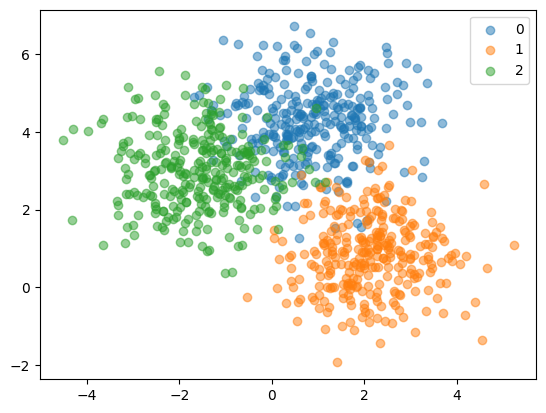

In [188]:
# your code goes here: 
X, y = make_blobs(n_samples=900, centers=3, n_features=2, random_state=0)

plot_data(X, y)

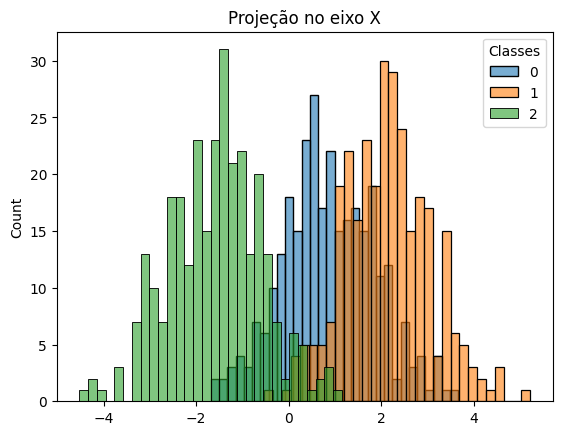

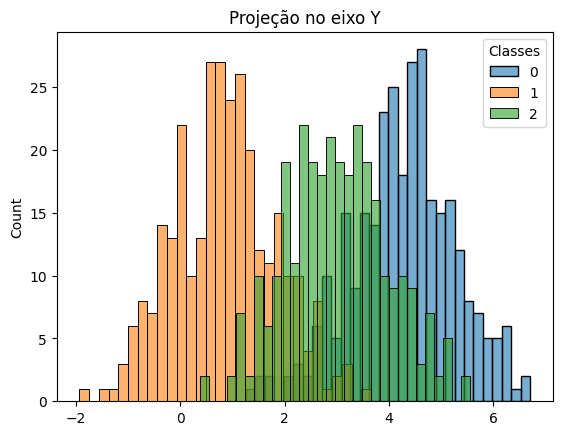

In [189]:
# your code goes here:
plot_hist(X[:,0], y, "Projeção no eixo X")
plot_hist(X[:,1], y, "Projeção no eixo Y")

## Exercise 2 - Linear Discriminant Analysis

* Use sklearn's implementation of LDA to project the points in a single dimension and then plot the projected data

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Remember that since we want to project our data onto a vector, the parameter n_components of `LinearDiscriminantAnalysis` should be set to 1

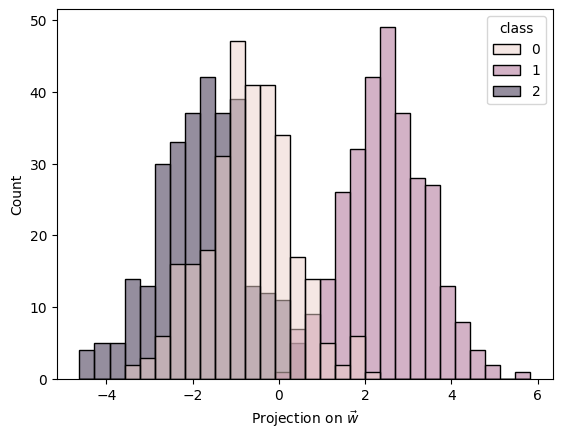

In [ ]:
# your code goes here: 


## Exercise 3 - Calculate test set accuracy

* use the default parameters for the LDA classifier, and report the prediction accuracy on a train/test split of 70/30% (use `random_state=0`)
* report also the accuracy of the `RidgeClassfier` you used in Part I 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# your code goes here:


Test Accuracies:
LDA classifier: 0.937037037037037
Ridge Classifier fitting: 0.9259259259259259


# Part III - Logistic Regression for Binary Classification

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30% train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset ($X$, $y$ numpy arrays)

In [ ]:
# your code goes here:


## Excercise 2 - Implementing Logistic Regression

* In this exercise you will implement the logistic regression algorithm to learn the vector of weights $\vec{w}$.
* You will then plot the ROC curve (using your implementation from the Tarefa), and calculate the AUROC (Area Under the ROC curve) using `sklearn.metrics.roc_auc_score()` for the testing set.

You can follow the structure for gradient descent as described in the previous labs and slides. Don't forget to write a function that calculates the sigmoid. You are not allowed in this exercise to use any existing functions.
* **Note that:** in the book and slides `y` is written as `t` and `y_hat` as `y`. 

Remember that $\nabla E(w) = \sum_{n=1}^N (y_n - t_n)\phi_n$ 

* _Tip:_ plot the loss during training to verify that everything is working properly.

In [ ]:
# your code goes here:


Evaluate the performance of your model, plot the ROC curve and calculate the AUROC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# your code goes here: 


# Part IV - Logistic Regression for multi-class classification

## Exercise 1 - Load the dataset
* Load the famous Iris dataset (using sklearn as shown below)
* Load the data in a matrix $X$ and the target in a vector $y$.
* Make a 70/30% train test partition of the dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

Prepare $X$ and $y$

In [ ]:
# your code goes here:


Split the data

In [ ]:
# your code goes here:


## Exercise 2 - Train the Logistic Regression model
Train your LogisticRegression multi-class classifier using the sklearn implementation. 
* To use the cross entropy loss function and softmax activation function, the `multi_class` parameter needs to be set to "multinomial"

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Let's create an instance of the LogisticRegression classifier for multiclass classification
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')

Fit the data

In [ ]:
# your code goes here: 


## Exercise 3 - Make predictions and evaluate the model
Use the `predict_proba()` method to obtain the output of the predictions for the testing set. The values are the output of the softmax activation function. 
* Remember that the highest value of each prediction corresponds to the actual predicted class.
* Write a function `get_predicted_class()` that transforms the vector of softmax outputs (obtained from `predict_proba()`) to a vector that just contains the predicted class. 
    - This function takes as input a matrix $\hat{Y}_{proba} \in \mathbb{R}^{m\times k}$ where $m$ is the number of samples in the testing set and $k$ is the number of classes.

As an example: if the softmax output is as follows: `Y_pred_sm = [[0.1,0.2,0.7], [0.4,0.3,0.3]]`, then `get_predicted_class(Y_pred_sm)` should return: `[2,0]` as the highest value for the 1st prediction is class 2 and for the 2nd prediction is class 0.

In [ ]:
# complete the input argument for the function to obtain the predictions for the testing set.
y_pred_sm = lr_iris.predict_proba()
y_pred = get_predicted_class(y_pred_sm)

In [ ]:
def get_predicted_class(Y_proba):
    # your code goes here:
    

Now calculate the accuracy in the testing set using `y_pred`

In [ ]:
# your code goes here:
